In [2]:
import os, sys, pickle

import matplotlib.pyplot as plt
import numpy as np
import collections
%matplotlib inline 

import jp_mpl as jplot

import pickle
import ratdb_reader
reload(ratdb_reader)
from scipy import interpolate
from copy import deepcopy

In [3]:
sno_dir = '/sb/project/qbs-015-aa/jpyanez/data/SOC_histograms_python'
all_files = [x for x in os.listdir(sno_dir) if 'pckl' in x]


In [5]:
usable_run_list =  [17375,
100556,
100558,
101427,
101428,
101432,
101433,
102518,
102529,
102552,
102554,
102570,
102572,
102574]

In [6]:
files = []
for one_file in all_files:
    for usable in usable_run_list:
        if "%i" % usable in one_file:
            files.append(one_file)

In [7]:
files

['SOC_0000017375.pckl',
 'SOC_0000100556.pckl',
 'SOC_0000100558.pckl',
 'SOC_0000101427.pckl',
 'SOC_0000101428.pckl',
 'SOC_0000101432.pckl',
 'SOC_0000101433.pckl',
 'SOC_0000102518.pckl',
 'SOC_0000102529.pckl',
 'SOC_0000102552.pckl',
 'SOC_0000102554.pckl',
 'SOC_0000102570.pckl',
 'SOC_0000102572.pckl',
 'SOC_0000102574.pckl']

In [8]:
one_file = files[0]

In [13]:
data.keys()

['residual_axis',
 'bin_width',
 'time_residuals',
 'manip_pos',
 'fit_pos',
 'wavelength',
 'pmt_delays',
 'soc_pmts']

In [16]:
xtest = np.linspace(-10, 20, 101)

Doing file SOC_0000017375.pckl
Bad 34
Doing file SOC_0000100556.pckl
Bad 18
Doing file SOC_0000100558.pckl
Bad 24
Doing file SOC_0000101427.pckl
Bad 158
Doing file SOC_0000101428.pckl
Bad 34
Doing file SOC_0000101432.pckl
Bad 17
Doing file SOC_0000101433.pckl
Bad 102
Doing file SOC_0000102518.pckl
Bad 62
Doing file SOC_0000102529.pckl
Bad 19
Doing file SOC_0000102552.pckl
Bad 58
Doing file SOC_0000102554.pckl
Bad 79
Doing file SOC_0000102570.pckl
Bad 56
Doing file SOC_0000102572.pckl
Bad 151
Doing file SOC_0000102574.pckl
Bad 8


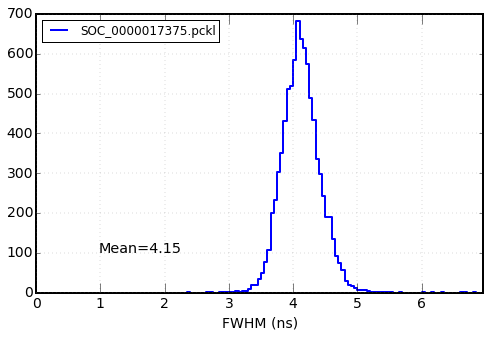

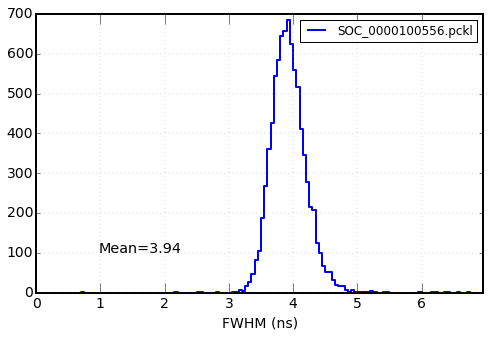

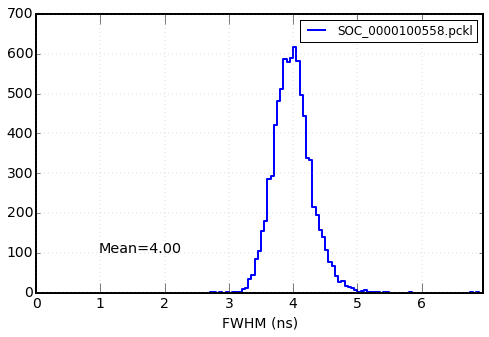

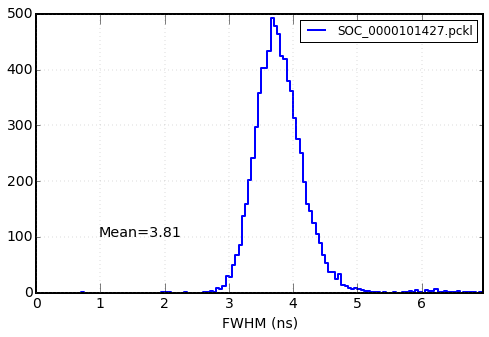

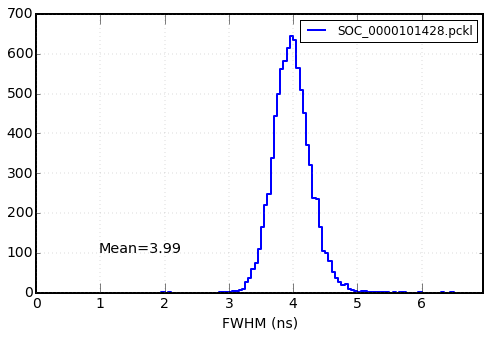

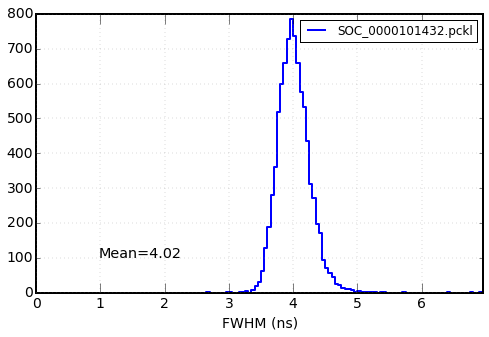

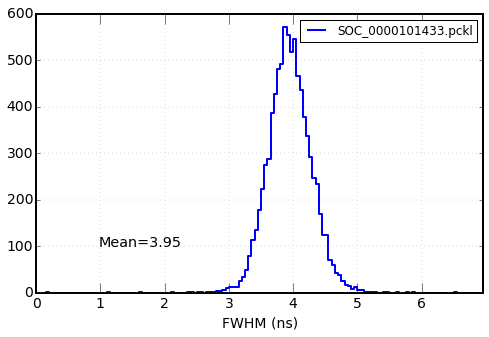

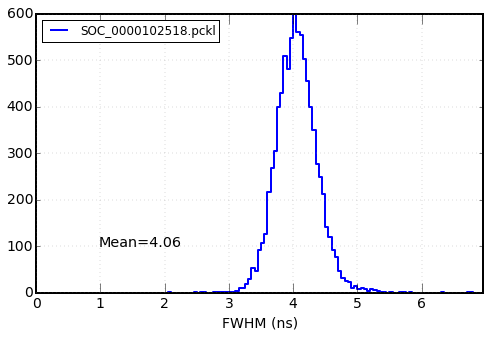

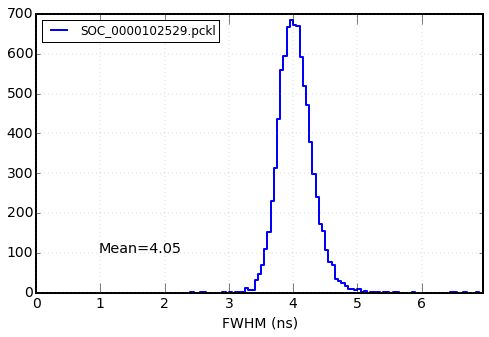

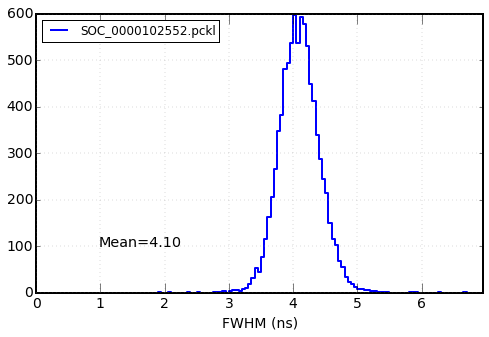

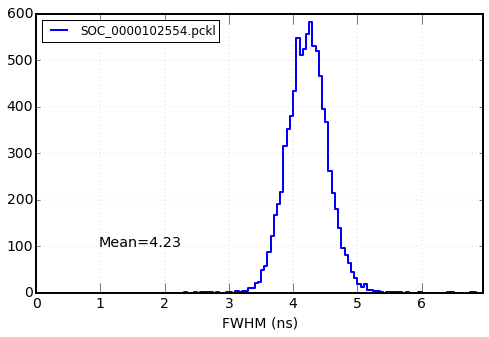

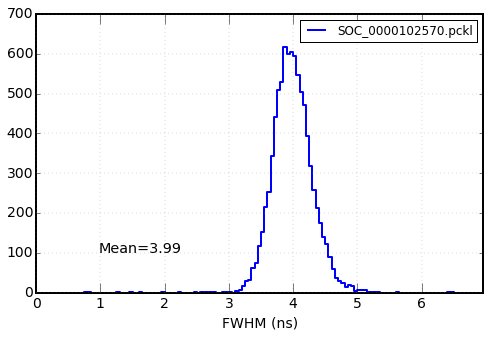

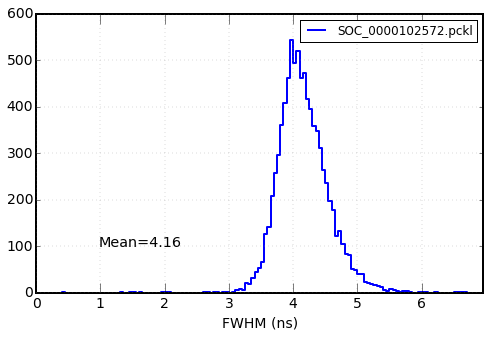

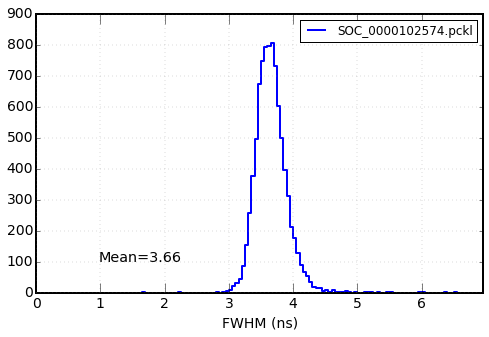

In [22]:
for one_file in files:
    print 'Doing file', one_file
    data = pickle.load(open(os.path.join(sno_dir, one_file)))
    x = data['residual_axis']
    xaxis = data['residual_axis']
    fwhm_sno = np.zeros(data['time_residuals'].shape[1])
    sumx = (xaxis[1:] + xaxis[:-1])/2.
    bad_pmt = 0
    for one_pmt in range(data['time_residuals'].shape[1]):

        sum_tres = data['time_residuals'][:, one_pmt]

        if sum_tres.sum() < 20:
            continue

        spline = interpolate.UnivariateSpline(sumx, sum_tres-sum_tres.max()/2., k=3)

        try:
            r1, r2 = spline.roots()
            fwhm_sno[one_pmt] = r2-r1
            #print what
        except:
            bad_pmt+=1
            #print spline.roots(), one_pmt
            #test = np.linspace(-15, 20, 101)
            #jplot.unfilledBar(xaxis, orig_tres, color='r')
            #print xaxis, x
            #jplot.unfilledBar(sumx, sum_tres[:-1]-sum_tres.max()/2.)
            #plt.plot(xtest, spline(xtest), color = 'red')
            #plt.show()
            #break
            #raw_input()

    print 'Bad', bad_pmt

    fig = plt.figure(figsize=(8,5))
    timearray = np.arange(0, 7, 0.05)
    b, _ = np.histogram(fwhm_sno[fwhm_sno>0], timearray)
    jplot.unfilledBar(timearray, b, label = one_file.rstrip('.rch'))
    np.median(fwhm_sno[fwhm_sno>0])
    plt.xlabel('FWHM (ns)')
    plt.text(1, 100, 'Mean='+"%.2f" % np.mean(fwhm_sno[fwhm_sno>0]), fontsize='x-large')
    plt.legend(loc=0)
    fig.savefig('/sb/project/qbs-015-aa/jpyanez/data/laserball_runs/snoplus_summary/' + one_file.rstrip('.pckl') + '.png')